# Explore data
In this file a data set consisting of 7 stocks and 4 indices is explored. Some calculations on option prices are done as well

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel('202208EquitiesData.xls')
# remove first row
data = data.iloc[1:]
# remove all columns containing only NaN
print(data.shape)
data = data.dropna(axis=1, how='all')
print(data.shape)

(4448, 32)
(4448, 22)


In [4]:
# rename the first column to "date_s1", second to "s2", third to "date_s2", fourth to "s2", fifth to "date_s3", sixth to "s3", seventh to "date_s4", eighth to "s4", nineth to "date_s5", thenth to "s5", eleventh to "date_s6", twelwth to "s6"
data.rename(columns={'Unnamed: 0': 'date_S1', 'Unnamed: 1': 'S1', 'Unnamed: 3': 'date_S2', 'Unnamed: 4': 'S2'}, inplace=True)
data.rename(columns={'Unnamed: 6': 'date_S3', 'Unnamed: 7': 'S3', 'Unnamed: 9': 'date_S4', 'Unnamed: 10': 'S4'}, inplace=True)
data.rename(columns={'Unnamed: 12': 'date_S5', 'Unnamed: 13': 'S5', 'Unnamed: 15': 'date_S6', 'Unnamed: 16': 'S6'}, inplace=True)
data.rename(columns={'Unnamed: 18': 'date_S7', 'Unnamed: 19': 'S7'}, inplace=True)

data.rename(columns={'Unnamed: 21': 'date_I1', 'Unnamed: 22': 'I1', 'Unnamed: 24': 'date_I2', 'Unnamed: 25': 'I2', 
    'Unnamed: 27': 'date_I3', 'Unnamed: 28': 'I3', 'Unnamed: 30': 'date_I4', 'Unnamed: 31': 'I4'}, inplace=True)



S is short for stock, I is short for index

In [5]:
data = data.convert_dtypes()
data.dtypes

date_S1    datetime64[ns]
S1                Float64
date_S2    datetime64[ns]
S2                Float64
date_S3    datetime64[ns]
S3                Float64
date_S4    datetime64[ns]
S4                Float64
date_S5    datetime64[ns]
S5                Float64
date_S6    datetime64[ns]
S6                Float64
date_S7    datetime64[ns]
S7                Float64
date_I1    datetime64[ns]
I1                Float64
date_I2    datetime64[ns]
I2                Float64
date_I3    datetime64[ns]
I3                Float64
date_I4    datetime64[ns]
I4                Float64
dtype: object

In [6]:
# save to csv
data.to_csv('202208EquitiesData.csv', index=False)

<AxesSubplot:xlabel='date_S1'>

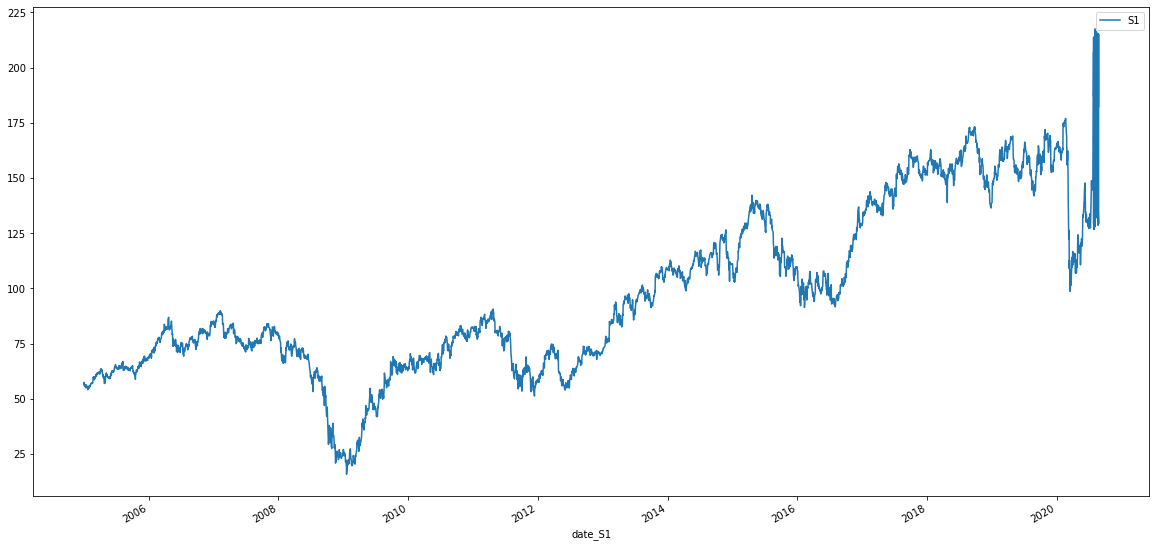

In [7]:
# ploting the first stock 
data[data["S1"].notna()][["date_S1", "S1"]].plot(x="date_S1", y="S1", figsize=(20,10))

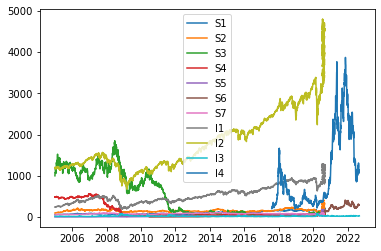

In [8]:

for i in range(0, data.shape[1], 2):
    # plot the first column in the x axis and the second column in the y axis
    #print(data.columns[i+1])
    temp = data.iloc[:, i:i+2]
    temp = temp[temp.iloc[:, 1].notna()]
    plt.plot(temp.iloc[:, 0].values, list(temp.iloc[:,1].values), label=data.columns[i+1])

plt.legend()
plt.show()


Above all the mystery stocks and indices are displayed in the same plot, stocks begin with S and index with I.

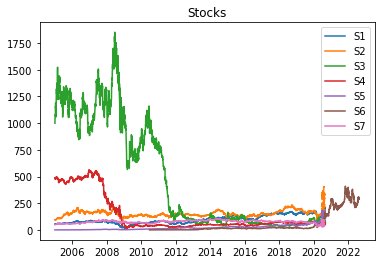

In [9]:
# now only plot the data for the stocks together
for i in range(0, data.shape[1]-8, 2):
    #print(data.columns[i+1])
    temp = data.iloc[:, i:i+2]
    temp = temp[temp.iloc[:, 1].notna()]
    plt.plot(temp.iloc[:, 0].values, list(temp.iloc[:,1].values), label=data.columns[i+1])

plt.title('Stocks')
plt.legend()
plt.show()

In [10]:
data[['S1','S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'I1', 'I2', 'I3','I4']].describe()

,S1,S2,S3,S4,S5,S6,S7,I1,I2,I3,I4
count,4434.000000,4434.000000,4434.000000,4444.000000,4444.000000,3064.000000,4444.000000,4446.000000,4444.000000,4448.000000,1277.000000
mean,106.588378,159.927945,437.735360,131.893903,36.012208,54.312857,76.030595,598.622938,2041.777995,19.363525,1049.040650
std,44.900486,41.281509,492.852731,161.879134,43.365181,92.607771,14.127860,263.650610,973.472235,9.164696,916.864589
min,15.858000,91.250000,30.460000,10.200000,1.130000,1.053000,31.450000,188.229000,676.530000,9.140000,197.590000
25%,70.400000,136.200000,66.000000,45.000000,6.379000,8.050250,67.072500,395.750750,1285.077500,13.240000,373.290000
50%,96.400000,149.200000,106.500000,55.330000,20.856500,15.918000,79.165000,528.580000,1754.935000,16.690000,555.370000
75%,145.837500,173.575000,911.957000,75.207500,42.934500,23.441250,86.577500,804.217500,2656.025000,22.630000,1651.620000
max,217.400000,406.150000,1850.000000,564.100000,182.010000,409.970000,104.590000,1287.390000,4796.560000,82.690000,3870.420000


In [11]:
data[['S1','S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'I1', 'I2', 'I3', 'I4']].head()

,S1,S2,S3,S4,S5,S6,S7,I1,I2,I3,I4
1,56.5,94.25,998.744,482.7,1.13,1.133,50.09,238.103,1202.08,14.08,207.15
2,57.45,91.5,1015.997,478.6,1.142,1.593,49.75,236.985,1188.05,13.98,209.48
3,56.5,91.25,1039.0,484.6,1.152,1.589,49.49,233.944,1183.74,14.09,204.59
4,55.788,92.25,1054.336,489.3,1.153,1.464,50.12,235.055,1187.89,13.58,234.29
5,56.5,92.5,1067.755,486.5,1.237,1.28,49.79,236.871,1186.19,13.49,250.77


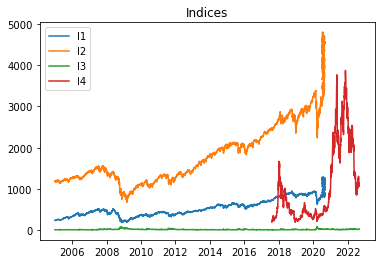

In [12]:
# plot only the data time series for indices toghter
for i in range(data.shape[1]-8, data.shape[1], 2):
    #print(data.columns[i+1])
    temp = data.iloc[:, i:i+2]
    temp = temp[temp.iloc[:, 1].notna()]
    plt.plot(temp.iloc[:, 0].values, list(temp.iloc[:,1].values), label=data.columns[i+1])

plt.title('Indices')
plt.legend()
plt.show()

Lets have a look at the movement of the different stocks/indices whent they are rescaled to start at 100

In [13]:
# extract every secound column from data and devide by the first column in the same column

test = data.copy()
test.iloc[:, 1::2] = test.iloc[:, 1::2].values/test.iloc[0, 1::2].values*100
test

,date_S1,S1,date_S2,S2,date_S3,S3,date_S4,S4,date_S5,S5,...,date_S7,S7,date_I1,I1,date_I2,I2,date_I3,I3,date_I4,I4
1,2005-01-03,100.0,2005-01-03,100.0,2005-01-03,100.0,2005-01-03,100.0,2005-01-03,100.0,...,2005-01-03,100.0,2005-01-03,100.0,2005-01-03,100.0,2005-01-03,100.000000,2017-08-02,100.0
2,2005-01-04,101.681416,2005-01-04,97.082228,2005-01-04,101.72747,2005-01-04,99.150611,2005-01-04,101.061947,...,2005-01-04,99.321222,2005-01-04,99.530455,2005-01-04,98.832856,2005-01-04,99.289773,2017-08-03,101.124789
3,2005-01-05,100.0,2005-01-05,96.816976,2005-01-05,104.030663,2005-01-05,100.393619,2005-01-05,101.946903,...,2005-01-05,98.802156,2005-01-05,98.253277,2005-01-05,98.474311,2005-01-05,100.071023,2017-08-04,98.764181
4,2005-01-06,98.739823,2005-01-06,97.877984,2005-01-06,105.566191,2005-01-06,101.367309,2005-01-06,102.035398,...,2005-01-06,100.059892,2005-01-06,98.719882,2005-01-06,98.819546,2005-01-06,96.448864,2017-08-07,113.101617
5,2005-01-07,100.0,2005-01-07,98.143236,2005-01-07,106.909779,2005-01-07,100.787238,2005-01-07,109.469027,...,2005-01-07,99.401078,2005-01-07,99.482577,2005-01-07,98.678125,2005-01-07,95.809659,2017-08-08,121.057205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,NaT,NaN,NaT,NaN,NaT,NaN,2020-07-07,10.312824,2020-07-07,14479.646018,...,2020-07-17,195.388301,2020-07-23,538.141057,2020-08-06,337.553241,2022-08-23,171.235795,NaT,NaN
4445,NaT,NaN,NaT,NaN,NaT,NaN,NaT,<NA>,NaT,<NA>,...,NaT,<NA>,2020-07-24,535.944528,NaT,<NA>,2022-08-24,162.073864,NaT,NaN
4446,NaT,NaN,NaT,NaN,NaT,NaN,NaT,<NA>,NaT,<NA>,...,NaT,<NA>,2020-07-27,527.452405,NaT,<NA>,2022-08-25,154.687500,NaT,NaN
4447,NaT,NaN,NaT,NaN,NaT,NaN,NaT,<NA>,NaT,<NA>,...,NaT,<NA>,NaT,<NA>,NaT,<NA>,2022-08-26,181.534091,NaT,NaN


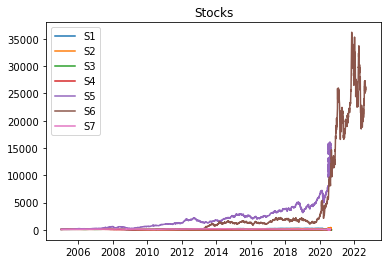

In [14]:
# plot the data time series for stocks
for i in range(0, test.shape[1]-8, 2):
    #print(data.columns[i+1])
    temp = test.iloc[:, i:i+2]
    temp = temp[temp.iloc[:, 1].notna()]
    plt.plot(temp.iloc[:, 0].values, list(temp.iloc[:,1].values), label=data.columns[i+1])

plt.title('Stocks')
plt.legend()
plt.show()

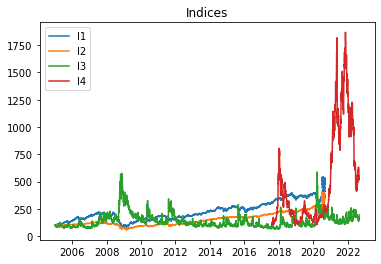

In [15]:
# plot the data time series for indices
for i in range(test.shape[1]-8, test.shape[1], 2):
    #print(data.columns[i+1])
    temp = test.iloc[:, i:i+2]
    temp = temp[temp.iloc[:, 1].notna()]
    plt.plot(temp.iloc[:, 0].values, list(temp.iloc[:,1].values), label=data.columns[i+1])

plt.title('Indices')
plt.legend()
plt.show()

Nothing significant discovered here either, except a seemingly constant value for `I4` with a spike around the housing bouble.
Lets look at each plot separately.

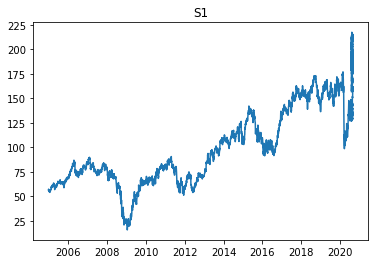

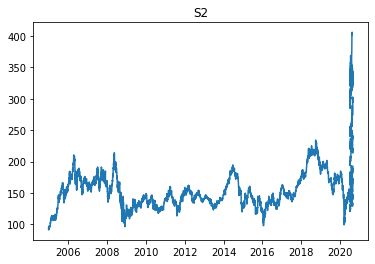

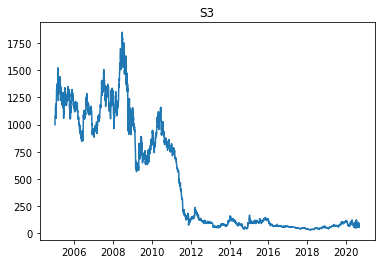

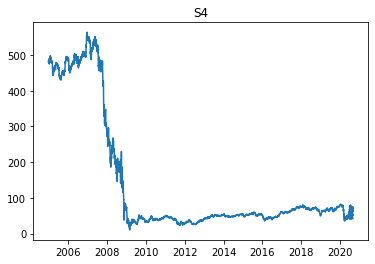

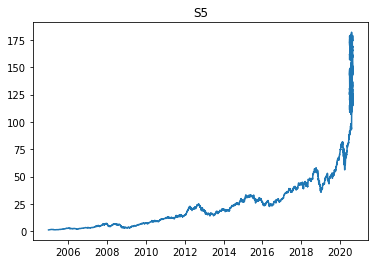

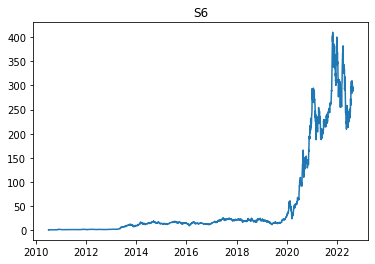

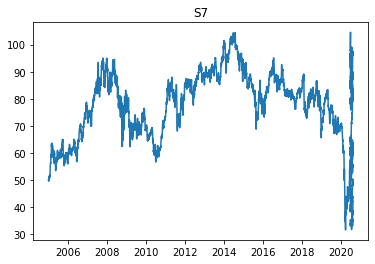

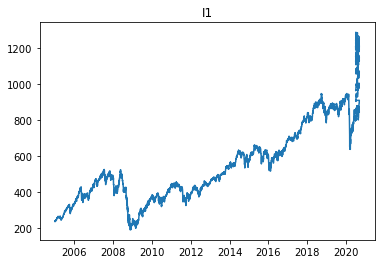

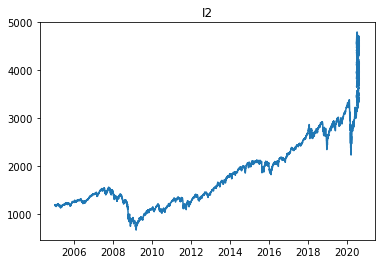

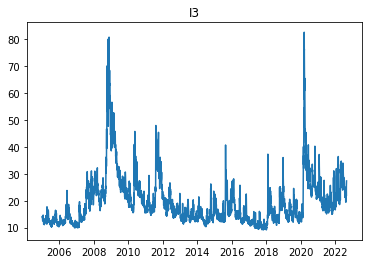

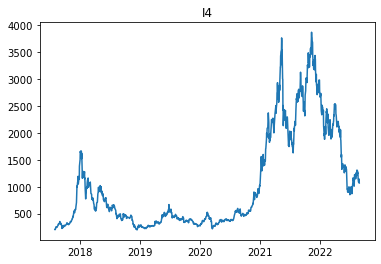

In [16]:
# plot each stock and index separately
for i in range(0, data.shape[1], 2):
    #print(data.columns[i+1])
    temp = data.iloc[:, i:i+2]
    temp = temp[temp.iloc[:, 1].notna()]
    plt.plot(temp.iloc[:, 0].values, list(temp.iloc[:,1].values), label=data.columns[i+1])
    plt.title(f'{data.columns[i+1]}')
    plt.show()

Can clealy see that `I3` is the VIX index. Still not to sure about most of the others. Now we will do the same thing, but will look at the difference of the log of the time series´.

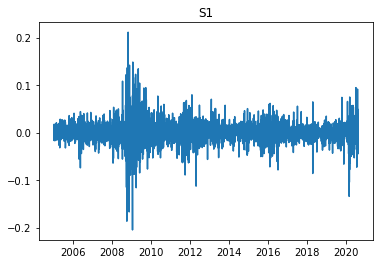

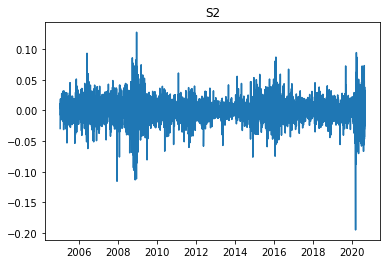

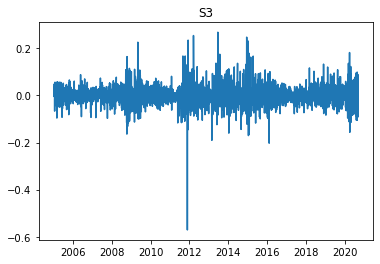

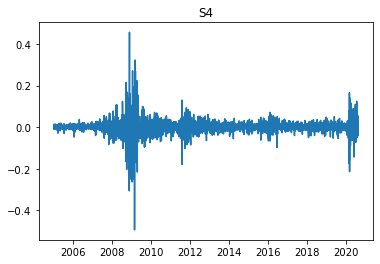

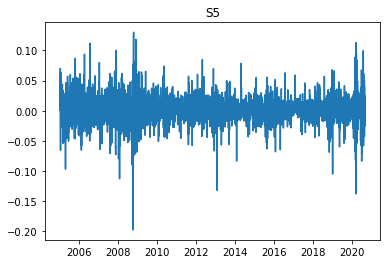

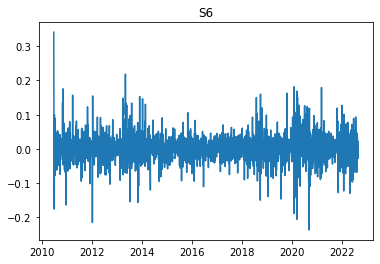

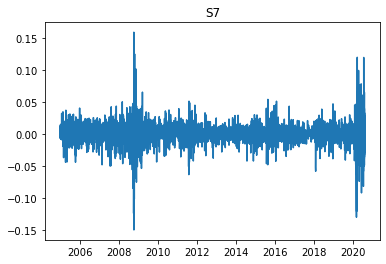

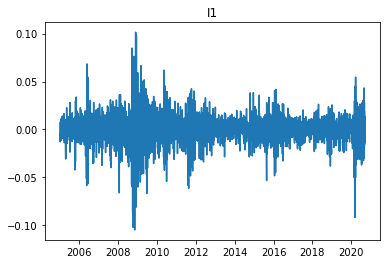

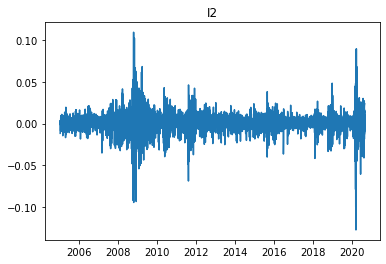

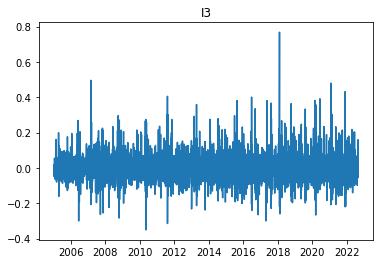

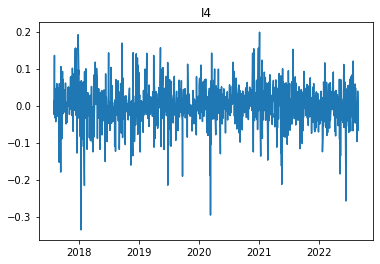

In [17]:
for i in range(0, data.shape[1], 2):
    #print(data.columns[i+1])
    temp = data.iloc[:, i:i+2]
    #temp = temp[temp.iloc[:, 1].notna()]
    temp.iloc[:,1] = np.log(temp.iloc[:,1]).diff()
    temp = temp[temp.iloc[:, 1].notna()]

    plt.plot(temp.iloc[:, 0].values, list(temp.iloc[:,1].values), label=data.columns[i+1])
    plt.title(f'{data.columns[i+1]}')
    plt.show()

From the above we can clearly see that the varaince depends on the previous variance. Disregard the two last indices.


2. Choose two or more of the seven time serieses and implement a random walk model based two of the stocks above. comment how the modell fits to the time serieses by looking at actual increments vs the model distribution. Finally, do the same for the two `I4` and `I3`.

We assume that the price of a stock follow the function:

$$ \frac{dS}{S} = \sigma dX + \mu dt $$


Where $S$ is the stock price, $\sigma$ is the (constant) variance, dX is standard normal distributed stocastic variable, $\mu$ is the average price increase.

We choose `S1` and `S2` as our stocks of choice. Calculate $\sigma$ and $\mu$ by looking at the log difference above.



In [18]:
# take the difference of the log of data["S1"] and data["S2"]
data["returns_S1"] = np.log(data["S1"]).diff()
data["returns_S2"] = np.log(data["S2"]).diff()
# do the same with the data["I3"] and data["I4"]
data["returns_I3"] = np.log(data["I3"]).diff()
data["returns_I4"] = np.log(data["I4"]).diff()

In [19]:
# look at the summary statistics of the returns
data[["returns_S1", "returns_S2", "returns_I3", "returns_I4"]].describe()

,returns_S1,returns_S2,returns_I3,returns_I4
count,4433.000000,4433.000000,4447.000000,1276.000000
mean,0.000268,0.000329,0.000149,0.001286
std,0.022244,0.019729,0.075969,0.052751
min,-0.204995,-0.194988,-0.350588,-0.336147
25%,-0.008973,-0.010111,-0.042079,-0.023978
50%,0.000000,0.000000,-0.006299,0.002330
75%,0.009882,0.011006,0.034594,0.030160
max,0.211077,0.127418,0.768245,0.198280


In [20]:
data["returns_S1"].count()

4433

In [21]:
# we need to simulate a standard normal distribution for all the returns
data.loc[data["returns_S1"].notna(), "norm_S1"] = np.random.normal(0, 1, data["returns_S1"].count())
data.loc[data["returns_S2"].notna(), "norm_S2"] = np.random.normal(0, 1, data["returns_S2"].count())
data.loc[data["returns_I3"].notna(), "norm_I3"] = np.random.normal(0, 1, data["returns_I3"].count())
data.loc[data["returns_I4"].notna(), "norm_I4"] = np.random.normal(0, 1, data["returns_I4"].count())

In [22]:
# now generate the random walks
data.loc[data["returns_S1"].notna(), "RW_S1"] = data["returns_S1"].std()*data["norm_S1"] + data["returns_S1"].mean()
data.loc[data["returns_S2"].notna(), "RW_S2"] = data["returns_S2"].std()*data["norm_S2"] + data["returns_S2"].mean()
data.loc[data["returns_I3"].notna(), "RW_I3"] = data["returns_I3"].std()*data["norm_I3"] + data["returns_I3"].mean()
data.loc[data["returns_I4"].notna(), "RW_I4"] = data["returns_I4"].std()*data["norm_I4"] + data["returns_I4"].mean()

In [23]:
data[["returns_S1", "RW_S1", "returns_S2", "RW_S2", "returns_I3", "RW_I3", "returns_I4", "RW_I4"]].count()

returns_S1    4433
RW_S1         4433
returns_S2    4433
RW_S2         4433
returns_I3    4447
RW_I3         4447
returns_I4    1276
RW_I4         1276
dtype: int64

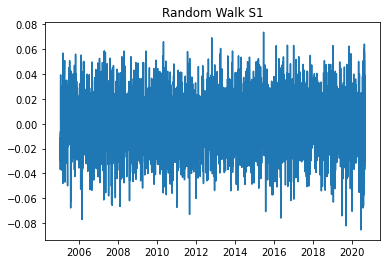

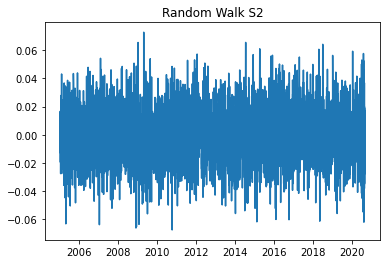

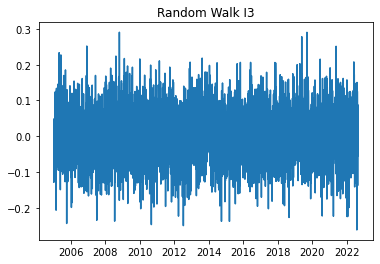

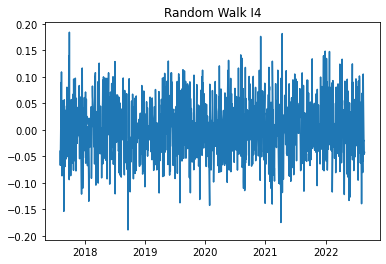

In [24]:
# plot the random walks
plt.plot(data["date_S1"],data["RW_S1"], label="RW_S1")
plt.title("Random Walk S1")
plt.show()
plt.plot(data["date_S2"],data["RW_S2"], label="RW_S2")
plt.title("Random Walk S2")
plt.show()
plt.plot(data["date_I3"],data["RW_I3"], label="RW_I3")
plt.title("Random Walk I3")
plt.show()
plt.plot(data["date_I4"],data["RW_I4"], label="RW_I4")
plt.title("Random Walk I4")
plt.show()


From the figures above we can see that there are no clear patterns in variance for either of the figures.

In [25]:
data[["returns_S1", "RW_S1", "returns_S2", "RW_S2", "returns_I3", "RW_I3", "returns_I4", "RW_I4"]]

,returns_S1,RW_S1,returns_S2,RW_S2,returns_I3,RW_I3,returns_I4,RW_I4
1,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN
2,0.016674,-0.029198,-0.029612,-0.019049,-0.007128,0.007053,0.011185,-0.040428
3,-0.016674,-0.011090,-0.002736,0.016643,0.007838,-0.128867,-0.02362,-0.067047
4,-0.012682,-0.013917,0.010899,-0.000009,-0.036867,0.038261,0.135552,0.013263
5,0.012682,-0.036793,0.002706,-0.000138,-0.006649,0.019959,0.067977,0.088950
...,...,...,...,...,...,...,...,...
4444,<NA>,NaN,<NA>,NaN,0.012941,-0.055029,<NA>,NaN
4445,<NA>,NaN,<NA>,NaN,-0.054989,0.072817,<NA>,NaN
4446,<NA>,NaN,<NA>,NaN,-0.046645,-0.022225,<NA>,NaN
4447,<NA>,NaN,<NA>,NaN,0.160037,0.036725,<NA>,NaN


In [26]:
data = data.convert_dtypes()

Text(0, 0.5, 'Random Walk')

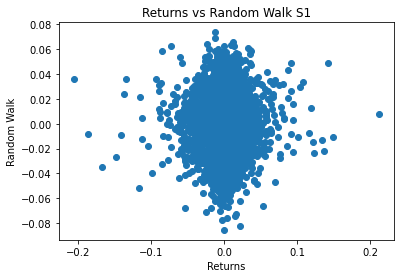

In [27]:
# plot the returns and the random walks together
plt.scatter(data[data["RW_S1"].notna()]["returns_S1"],data[data["RW_S1"].notna()]["RW_S1"])
plt.title("Returns vs Random Walk S1")
plt.xlabel("Returns")
plt.ylabel("Random Walk")
#plt.plot(data["returns_S1"],data["RW_S1"], label="RW_S1")

In [28]:

ret = data[["RW_S1", "RW_S2", "RW_I3", "RW_I4"]]
#ret = np.exp(ret)
ret.iloc[0, :] = np.log(data[["S1", "S2", "I3", "I4"]].iloc[0, :])

for i in range(1, ret.shape[0]):
    ret.iloc[i, :] = ret.iloc[i-1, :] + ret.iloc[i, :]

ret = np.exp(ret)

/Users/thoma/miniforge3/envs/ds/lib/python3.8/site-packages/pandas/core/indexing.py:1797: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)


In [29]:
ret.iloc

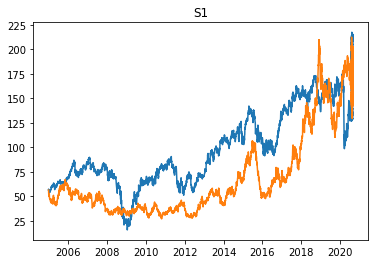

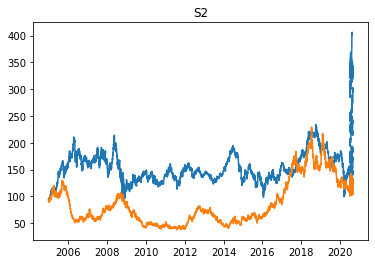

In [30]:
# plot each stock and index separately
count = 0

for i in range(0, ret.shape[1], 2):
    #print(data.columns[i+1])
    temp = data.iloc[:, i:i+2]
    temp = temp[temp.iloc[:, 1].notna()]
    temp2 = ret.iloc[:, count]
    temp2 = temp2[temp2.notna()]
    plt.plot(temp.iloc[:, 0].values, list(temp.iloc[:,1].values), label=data.columns[i+1])
    plt.plot(temp.iloc[:, 0], list(temp2.values), label=data.columns[i+1])
    plt.title(f'{data.columns[i+1]}')
    plt.show()
    count += 1

Big differences.

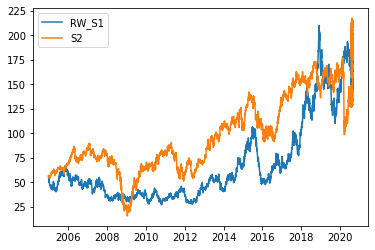

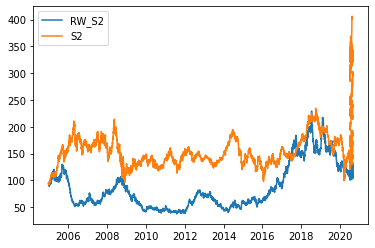

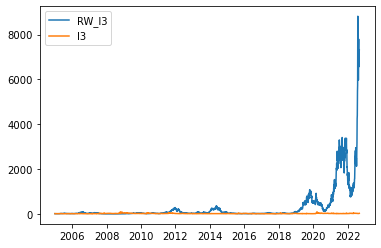

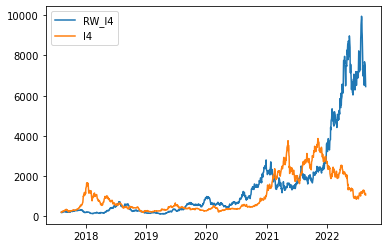

In [31]:
plt.plot(data[data["date_S1"].notna()]["date_S1"].values,list(ret[data["date_S1"].notna()]["RW_S1"].values), label="RW_S1")
plt.plot(data[data["date_S1"].notna()]["date_S1"].values,list(data[data["date_S1"].notna()]["S1"].values), label="S2")
plt.legend()
plt.show()

plt.plot(data[data["date_S2"].notna()]["date_S2"].values,list(ret[data["date_S2"].notna()]["RW_S2"].values), label="RW_S2")
plt.plot(data[data["date_S2"].notna()]["date_S2"].values,list(data[data["date_S2"].notna()]["S2"].values), label="S2")
plt.legend()
plt.show()

plt.plot(data[data["date_I3"].notna()]["date_I3"].values,list(ret[data["date_I3"].notna()]["RW_I3"].values), label="RW_I3")
plt.plot(data[data["date_I3"].notna()]["date_I3"].values,list(data[data["date_I3"].notna()]["I3"].values), label="I3")
plt.legend()
plt.show()

plt.plot(data[data["date_I4"].notna()]["date_I4"].values,list(ret[data["date_I4"].notna()]["RW_I4"].values), label="RW_I4")
plt.plot(data[data["date_I4"].notna()]["date_I4"].values,list(data[data["date_I4"].notna()]["I4"].values), label="I4")
plt.legend()
plt.show()


3) Definer to europeiske opsjoner på en eller flere av seriene og pris dem med både Black-Scholes formelen og ved å simulere fra en av modellene definert i 2) Velg en som er at-the-money og en som er et stykke out-of-the money. Verifiser at begge måter gir samme svar. Velg så et eller flere sluttpunkt som ikke er enden av tidsserien (med nok tid igjen i data til at opsjonen kommer til forfall) og vis pris og fordeling ved forfall på et par tidspunkt i opsjonens levetid - samt hvor faktisk sluttverdi faller i disse.

3) Define two European options on one or more of the time series´ and price them using the Black-Scholes formula and by simulating from one of the models defined in 2). Chose one that is at-the-money and one that is out-of-the-money. Verify that both ways yields the same answer. 

In [32]:
# import normal distribution
from scipy.stats import norm

In [33]:
# make a function that takes in stock values, strike price, and time to maturity, risk free rate, volatility, and returns the price of the option
def call_option(S, E, T, t,r, sigma):
    time = (T-t).days
    try:
        if time > 0:
            d1 = (np.log(S/E) + (r + sigma**2/2)*time)/(sigma*np.sqrt(time))
            d2 = d1 - sigma*np.sqrt(time)
            price = S*norm.cdf(d1) - E*np.exp(-r*time)*norm.cdf(d2)
        else :
            price = np.NaN
    except:
        price = np.NaN
    return price


# now make a put option
def put_option(S, E, T, t, r, sigma):
    time = (T-t).days
    try:
        if time > 0:
            d1 = (np.log(S/E) + (r + sigma**2/2)*time)/(sigma*np.sqrt(time))
            d2 = d1 - sigma*np.sqrt(time)
            price = E*np.exp(-r*time)*norm.cdf(-d2) - S*norm.cdf(-d1)
        else :
            price = np.NaN
    except:
        price = np.NaN
    return price



In [34]:
time = data[data["date_S1"].notna()]["date_S1"].values[-1]

In [35]:
data["RW_S1_last"] = ret["RW_S1"]
data["RW_S2_last"] = ret["RW_S2"]
data["RW_I3_last"] = ret["RW_I3"]
data["RW_I4_last"] = ret["RW_I4"]

In [36]:
import datetime as dt

In [37]:
m = data["returns_S1"].mean()
std = data["returns_S1"].std()
print(std, m)
data.loc[:,"RW_S1_put_300"] = data.apply(lambda x: put_option(x["RW_S1_last"],300,time,x["date_S1"], m, std), axis=1)
data.loc[:,"RW_S1_call_300"] = data.apply(lambda x: call_option(x["RW_S1_last"],300,time,x["date_S1"], m, std), axis=1)

0.02224373875726924 0.0002680521125601983


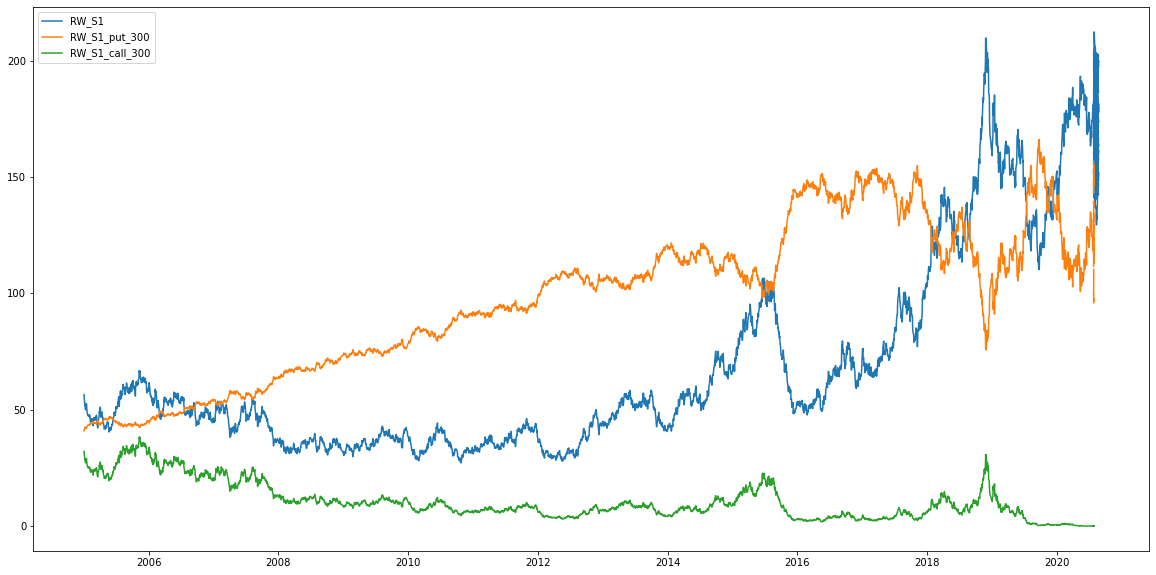

In [38]:
# print the call and put prices with the stock price
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(data[data["date_S1"].notna()]["date_S1"].values,list(data[data["date_S1"].notna()]["RW_S1_last"].values), label="RW_S1")
plt.plot(data[data["date_S1"].notna()]["date_S1"].values,list(data[data["date_S1"].notna()]["RW_S1_put_300"].values), label="RW_S1_put_300")
plt.plot(data[data["date_S1"].notna()]["date_S1"].values,list(data[data["date_S1"].notna()]["RW_S1_call_300"].values), label="RW_S1_call_300")
plt.legend()
plt.show()

In [39]:
# print the call and put prices with the stock price
data.loc[:,"RW_S1_put_100"] = data.apply(lambda x: put_option(x["RW_S1_last"],100,time,x["date_S1"], m, std), axis=1)
data.loc[:,"RW_S1_call_100"] = data.apply(lambda x: call_option(x["RW_S1_last"],100,time,x["date_S1"], m, std), axis=1)

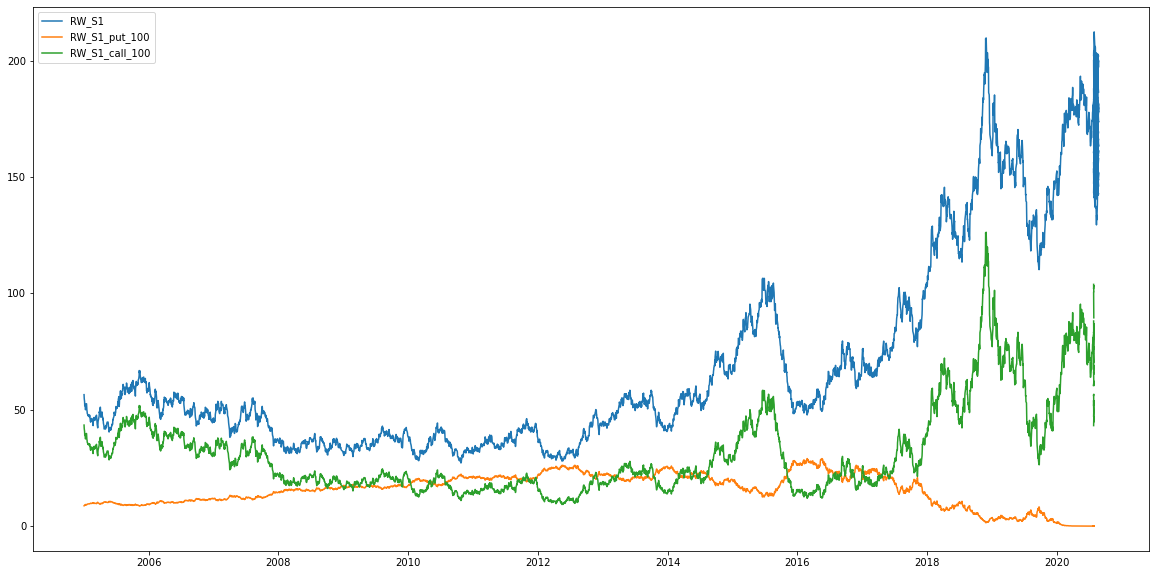

In [40]:
# plot
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(data[data["date_S1"].notna()]["date_S1"].values,list(data[data["date_S1"].notna()]["RW_S1_last"].values), label="RW_S1")
plt.plot(data[data["date_S1"].notna()]["date_S1"].values,list(data[data["date_S1"].notna()]["RW_S1_put_100"].values), label="RW_S1_put_100")
plt.plot(data[data["date_S1"].notna()]["date_S1"].values,list(data[data["date_S1"].notna()]["RW_S1_call_100"].values), label="RW_S1_call_100")
plt.legend()
plt.show()

In [41]:
# print the call and put prices with the stock price
data.loc[:,"S1_put_100"] = data.apply(lambda x: put_option(x["S1"],100,time,x["date_S1"], m, std), axis=1)
data.loc[:,"S1_call_100"] = data.apply(lambda x: call_option(x["S1"],100,time,x["date_S1"], m, std), axis=1)

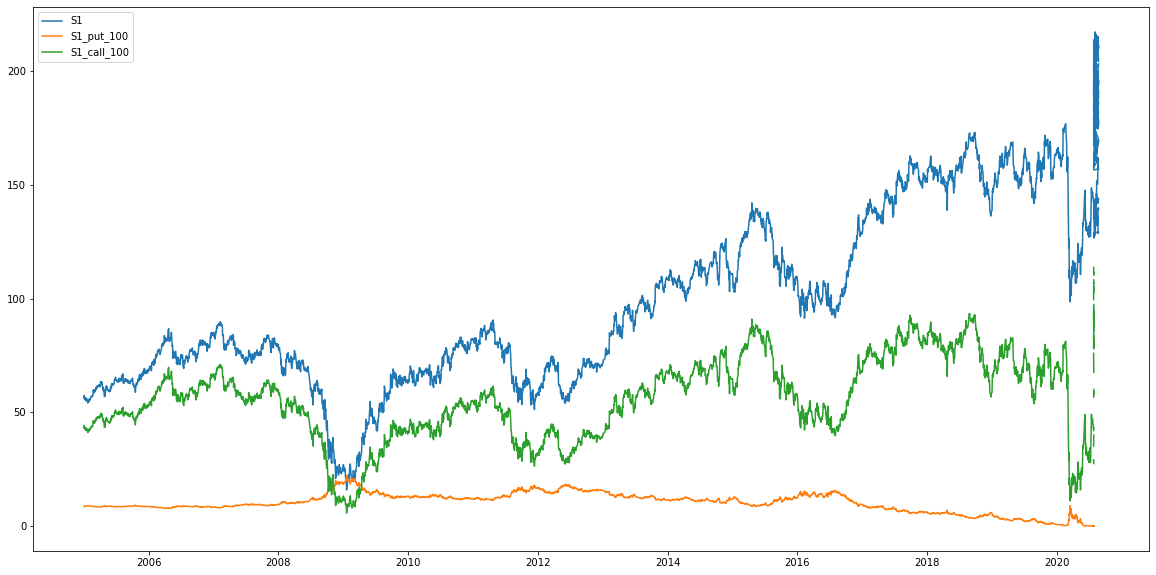

In [42]:
# plot
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(data[data["date_S1"].notna()]["date_S1"].values,list(data[data["date_S1"].notna()]["S1"].values), label="S1")
plt.plot(data[data["date_S1"].notna()]["date_S1"].values,list(data[data["date_S1"].notna()]["S1_put_100"].values), label="S1_put_100")
plt.plot(data[data["date_S1"].notna()]["date_S1"].values,list(data[data["date_S1"].notna()]["S1_call_100"].values), label="S1_call_100")
plt.legend()
plt.show()


In [43]:
# do the same for 300 
data.loc[:,"S1_put_300"] = data.apply(lambda x: put_option(x["S1"],300,time,x["date_S1"], m, std), axis=1)
data.loc[:,"S1_call_300"] = data.apply(lambda x: call_option(x["S1"],300,time,x["date_S1"], m, std), axis=1)

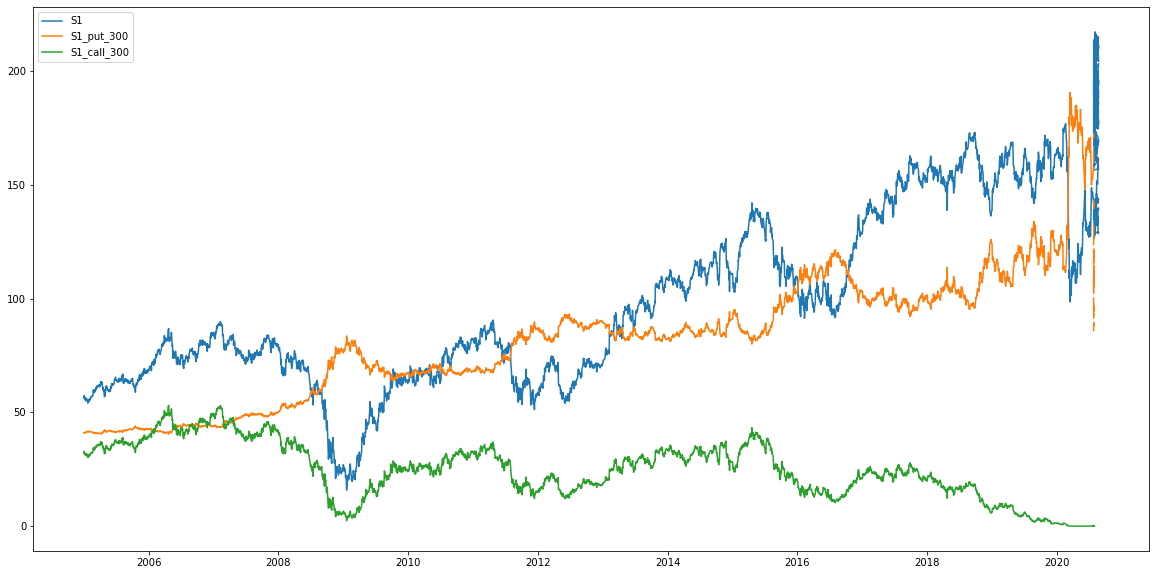

In [44]:
# plot
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(data[data["date_S1"].notna()]["date_S1"].values,list(data[data["date_S1"].notna()]["S1"].values), label="S1")
plt.plot(data[data["date_S1"].notna()]["date_S1"].values,list(data[data["date_S1"].notna()]["S1_put_300"].values), label="S1_put_300")
plt.plot(data[data["date_S1"].notna()]["date_S1"].values,list(data[data["date_S1"].notna()]["S1_call_300"].values), label="S1_call_300")
plt.legend()
plt.show()





4) compare the VIX to the two stocks chosen in the previous task.
   

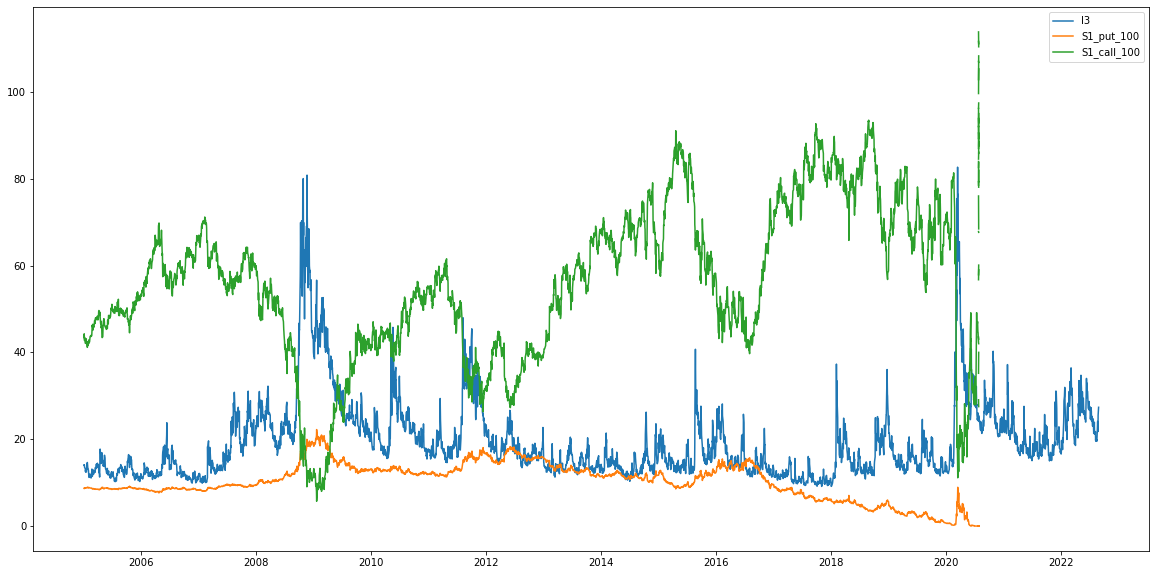

In [65]:
# plot I3
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(data[data["date_I3"].notna()]["date_I3"].values,list(data[data["date_I3"].notna()]["I3"].values), label="I3")
# plot call and put prices
plt.plot(data[data["date_I3"].notna()]["date_S1"].values,list(data[data["date_I3"].notna()]["S1_put_100"].values), label="S1_put_100")
plt.plot(data[data["date_I3"].notna()]["date_S1"].values,list(data[data["date_I3"].notna()]["S1_call_100"].values), label="S1_call_100")
plt.legend()
plt.show()

5) Ta for deg serien helt til høyre – hva kan så dette være?  Sammenlign gjerne med serie nr 9 fra venstre over pre- gjennom- og post-pandemi. 

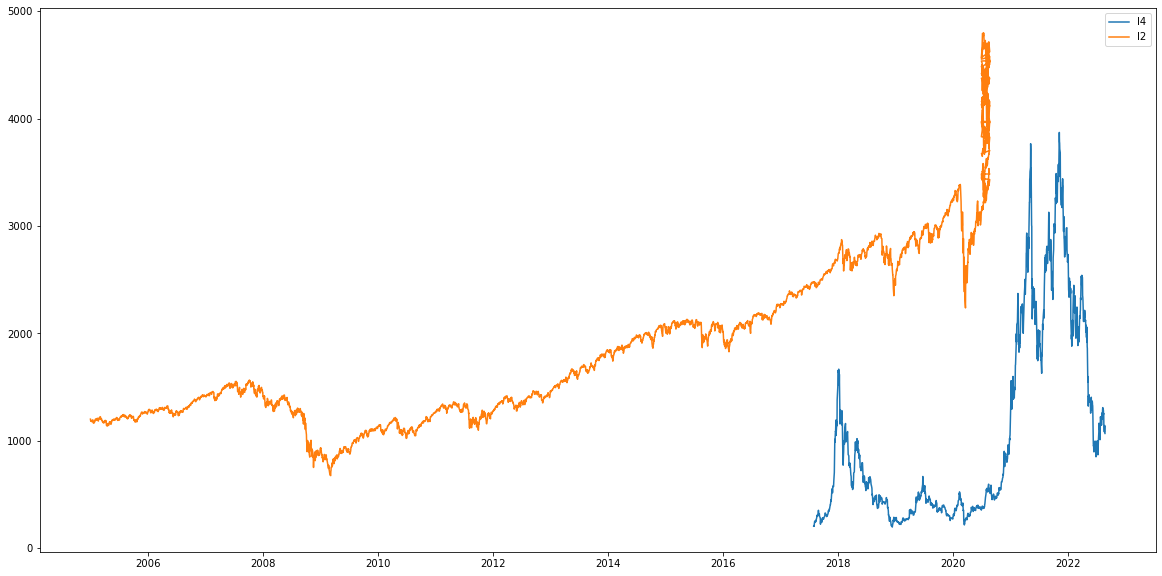

In [53]:
# plot I4
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(data[data["date_I4"].notna()]["date_I4"].values,list(data[data["date_I4"].notna()]["I4"].values), label="I4")
# plot I2
plt.plot(data[data["date_I2"].notna()]["date_I2"].values,list(data[data["date_I2"].notna()]["I2"].values), label="I2")
plt.legend()
plt.show()


In [64]:
data[["date_I2","I2"]].isna().sum()#.plot(x="date_I4", y="I4", figsize=(20,10))

date_I2    4
I2         4
dtype: int64

The series above looks like a cyrpto currency since the currncy crashes at the same time as bitcoin in 2018 and similarly in 2021/22